In [3]:
import matplotlib as plt
import pandas as pd
import numpy as np
from pathlib import Path

from plotting.grouped_bar_uncertainty import *

colours_df = pd.read_csv('plotting/colours.csv', index_col=0)

In [4]:
def load_results(sheet_name, number_of_modules, methods):
    df = pd.read_excel(f'../data/Results/UCL_Dissertation_Data.xlsx', sheet_name=sheet_name)
    if len(df.columns) == 7:
        df.columns = ['omic', 'nsamples', 'model', 'r2', 'r2_std', 'mse', 'mse_std']
    else:
        df.columns = ['omic', 'nsamples', 'model', 'r2', 'r2_std', 'mse', 'mse_std', 'info']
    print(df.head())

    results_mean = {}
    results_std = {}
    for dataset in number_of_modules:
        dataset_means = []
        dataset_vars = []
        for method in methods:
            df_filtered = df[(df["omic"] == dataset) & (df["model"] == method)]
            # df_filtered = df[(df["omic"] == dataset)]
            if len(df_filtered) > 1:
                row = df_filtered.iloc[0]
                dataset_means.append(row[metric])
                dataset_vars.append(row[metric + "_std"])
            elif len(df_filtered) >0:
                dataset_means.append(df_filtered[metric].item())
                dataset_vars.append(df_filtered[metric+"_std"].item())
            else:
                dataset_means.append(None)
                dataset_vars.append(None)
        results_mean[dataset] = dataset_means
        results_std[dataset] = dataset_vars
    print(results_mean)
    return results_mean, results_std

## Modules experiement

### Count modules

In [41]:
for dataset in ["proteomics_imputed", "rna_imputed", "methylation_imputed"]:
    print(f"*** {dataset}")
    for nmodules in ["500", "most-enriched", "all"]:
        df = pd.read_csv(f"../modules_experiment/gsva_scores/gsva_scores_{dataset}_{nmodules}.csv", index_col=0)
        print(f"{nmodules}: {df.shape[1]}")

    my_file = Path(f"../data/Cleveland/{dataset}.csv")
    if my_file.is_file():
        df = pd.read_csv(f"../data/Cleveland/{dataset}.csv", index_col=0)
        print(f"Original: {df.shape}")
    else:
        df = pd.read_csv(f"../data/Imputed/{dataset}.csv", index_col=0)
        print(f"Original: {df.shape}")

*** proteomics_imputed
500: 500
most-enriched: 977
all: 2760
Original: (1521, 4922)
*** rna_imputed
500: 500
most-enriched: 1227
all: 5092
Original: (498, 15278)
*** methylation_imputed
500: 500
most-enriched: 1202
all: 4970
Original: (1521, 14608)


### Plot for given data

In [55]:
data_name = "proteomics_imputed"
data_name_print = "RNA (imputed)"
number_of_modules = ["500", "most-enriched", "all"]

methods = ["krr", "krr2", "enet", "xgb", "svr", "mlp"]
methods_print = ["KRR", "KRR (RBF)", "ElasticNet"]
metric = "r2"

In [56]:
results_mean = {}
results_std = {}
for dataset in number_of_modules:
    dataset_means = []
    dataset_vars = []
    for method in methods:
        results_dir = f"../runs/runs_modules/{data_name}/{dataset}/{method}"

        my_file = Path(f"{results_dir}/aggregated_test_results.csv")
        if my_file.is_file():
            df = pd.read_csv(f"{results_dir}/aggregated_test_results.csv", index_col=0)
        
            dataset_means.append(df.loc["auc_"+metric, "mean"])
            dataset_vars.append(df.loc["auc_"+metric, "std"])
        else:
            dataset_means.append(None)
            dataset_vars.append(None)
    results_mean[dataset] = dataset_means
    results_std[dataset] = dataset_vars

print(results_mean)
print(results_std)

{'500': [0.2580800236090451, 0.2463009025216251, 0.2549444218049653, 0.281753057147912, 0.2049694427810205, None], 'most-enriched': [0.259526609989943, 0.2450277307913737, 0.2548657709302003, None, 0.2084996826812516, None], 'all': [0.2442024187752937, 0.2533660174177352, 0.2403840006124373, None, 0.2280386890244297, None]}
{'500': [0.031779425481109, 0.0380377702233218, 0.0404323836255582, 0.0347602846357443, 0.026155113640991, None], 'most-enriched': [0.0370225339210893, 0.036878484615162, 0.0419291429225147, None, 0.0274612112056786, None], 'all': [0.0692546362312477, 0.063222707361881, 0.056553739242204, None, 0.0553431715652409, None]}


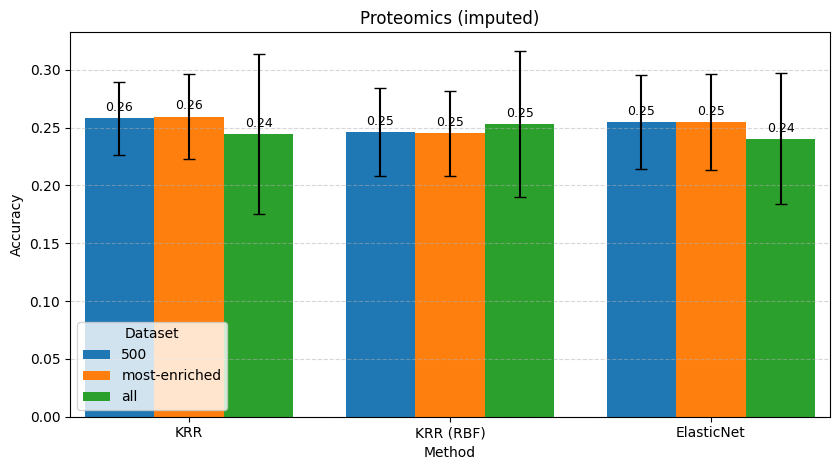

In [ ]:


data = results_mean
# Option A: symmetric errors (same length as methods)
errors = results_std
# Option B: asymmetric errors (provide 'lower' and 'upper')
# errors["Dataset 2"] = {"lower": [0.02, 0.03, 0.01], "upper": [0.04, 0.05, 0.03]}

fig, ax = plot_grouped_bars_with_uncertainty(
    data=data,
    methods=methods_print,
    errors=errors,                 # or None
    title=f"{data_name_print}",
    ylabel="Accuracy",
    annotate=True,                 # show values on the bars
)


### Imputed vs. not imputed

In [4]:
### Imputed
title = "Imputed vs. non-imputed datasets"
sheet_name = "Single - Imputed"
number_of_modules = ["Histone", "Histone (Imputed)", "Methylation", "Methylation (Imputed)", "RNA", "RNA (imputed)"]
datasets_print = None
hatches = [False, True, False, True, False, True]
colors = colors = {"Histone": "lightsteelblue", "Histone (Imputed)": "cornflowerblue", "Methylation": "wheat", "Methylation (Imputed)": "tan", "RNA": "thistle", "RNA (imputed)":"orchid"}

methods = ["Kernel Ridge Regression (polynomial)", "Lasso", "ElasticNet", "XGBoost", "Support Vector Regressor (polynomial)"]
methods_print = ["KRR", "Lasso", "ElasticNet", "XGBoost", "SVR"]
metric = "r2"

### Histone

In [104]:
### HISTONE
sheet_name = "Single - Histone"
title = "Global histone modification data"
number_of_modules = ["Histone", "Histone (H3K4)"]
datasets_print = ["Histone (39 features)", "Histone H3K4 (4 features)"]
colors = colors = {"Histone": "lightsteelblue", "Histone (Imputed)": "cornflowerblue"}

methods = ["Kernel Ridge Regression (polynomial)", "Lasso", "ElasticNet", "XGBoost"]
methods_print = ["KRR", "Lasso", "ElasticNet", "XGBoost", ]
metric = "r2"
hatches = [False, False]


# The appendix version
# number_of_modules = ["Histone", "Histone (H3K4)", "Hisotne (Preprocess and fill with 0)", "Histone (Fill NaN values with 0)", "Histone (drop NaN)"]
# datasets_print = ["Histone (39 features)", "Histone H3K4 (4 features)", "Histone - fill NaN with 0 (39 features)", "Histone - fill NaN with 0 (42 features)", "Hisotne (42 features, 242 samples)"]
# # colors = colors = {"Histone": "lightsteelblue", "Histone (Imputed)": "cornflowerblue", }

# methods = ["Kernel Ridge Regression (polynomial)", "Lasso", "ElasticNet", "XGBoost"]
# methods_print = ["KRR", "Lasso", "ElasticNet", "XGBoost", ]
# metric = "r2"

MLP mid-fusion

In [92]:
### Imputed
title = "MLP mid-fuison"
sheet_name = "Multi - MLP"
methods = [""]
methods_print = [""]

colors = None
number_of_modules = ["Meth (500 modules)",
"RNA (500 modules) ",
"Prot (500 modules)",
"RNA (500 mods) + Meth (500 mods)",
"RNA (500 mods) + Prot (500 mods)",
"Meth (500 mods) + Prot (500 mods)",
"RNA (500 mods) + Meth (500 mods) + Prot (500 mods)"]
datasets_print = ["Methylation", "RNA-Seq", "Proteomics", "RNA+Meth", "RNA+Prot", "Meth+Prot", "RNA+Meth+Prot"]

hatches = [True]*3 + [False]*(len(number_of_modules)-3)
metric = "r2"

Methylation - Single


In [15]:
sheet_name = "Single - Methylation"
title = "Gene Methylation Data"
number_of_modules = ["Methylation", "Methylation TruncatedSVD_50", "Methylaiton TruncatedSVD_100", "Methylaiton VarianceThreshold=0.1"]
datasets_print = ["raw genes", "Truncated SVD 50", "Truncated SVD 100", "Variance Threshold 0.1"]
colors = None

methods = ["Kernel Ridge Regression (polynomial)", "Lasso", "ElasticNet", "XGBoost"]
methods_print = ["KRR", "Lasso", "ElasticNet", "XGBoost"]
metric = "r2"
hatches = [False, False, False, False]

Methylation + Histone (Concat + dim reduction)

In [21]:
sheet_name = "Multi - Histone+RNAMeth"
title = "Modality combination: Methylation and Histone"
number_of_modules = ["Meth", "Histone + Meth", "Meth - TruncatedSVD", "Histone + Meth (TruncatedSVD)"]
datasets_print = ["Meth (Imputed)", "Meth (Imputed) + Histone", "Meth (Imputed, dim. reduction)", "Meth (Imputed, dim. reduction) + Histone"]
hatches = [True, False, True, False]
colors = ["cornflowerblue", "cornflowerblue", "orchid", "orchid"]

methods = ["Lasso", "ElasticNet", "KRR"]
methods_print = methods 
metric = "r2"

RNA + Histone (Concat + dim reduction)

In [44]:
sheet_name = "Multi - Histone+RNAMeth"
title = "Modality combination: RNA and Histone"
number_of_modules = ["RNA (Imputed)", "Histone + RNA (Imputed)", 
"RNA (Imputed) (TruncatedSVD)", "Histone + RNA (Imp, TruncatedSVD)",
"RNA (Imputed) (VarianceThreshold) 14k", "Histone + RNA (Imputed, VT0.1)"
]
datasets_print = ["RNA", "RNA + Histone", "RNA (Truncated SVD)", "RNA (Truncated SVD) + Histone", "RNA (Variance Thr)", "RNA (Variance Thr) + Histone"]
hatches = [True, False, True, False, True, False]
colors = ["cornflowerblue", "cornflowerblue", "orchid", "orchid", "tan", "tan"]

methods = ["Lasso", "ElasticNet", "KRR"]
methods_print = methods 
metric = "r2"

Concatenation of modules

                                   omic  nsamples       model      r2  r2_std  \
0  500 modules - modality concatenation       NaN         NaN     NaN     NaN   
1                            Meth + RNA     518.0  ElasticNet  0.2350   0.079   
2                            Meth + RNA       NaN         KRR  0.2369   0.088   
3                            Meth + RNA       NaN       Lasso  0.1716   0.090   
4                            Meth + RNA       NaN     XGBoost  0.2524   0.090   

                   mse  mse_std  
0                  NaN      NaN  
1                1.357   0.2187  
2  3541-01-01 00:00:00   0.2220  
3                1.470   0.2290  
4  3260-01-01 00:00:00   0.2150  
{'Meth + RNA': [0.2524], 'RNA + Prot': [0.249], 'Meth + Prot': [0.2629], 'Meth + RNA + Prot': [0.2633]}
                    omic  nsamples                                 model  \
0  RNASeq (1262 modules)     511.0  Kernel Ridge Regression (polynomial)   
1                    NaN       NaN         Kernel Rid

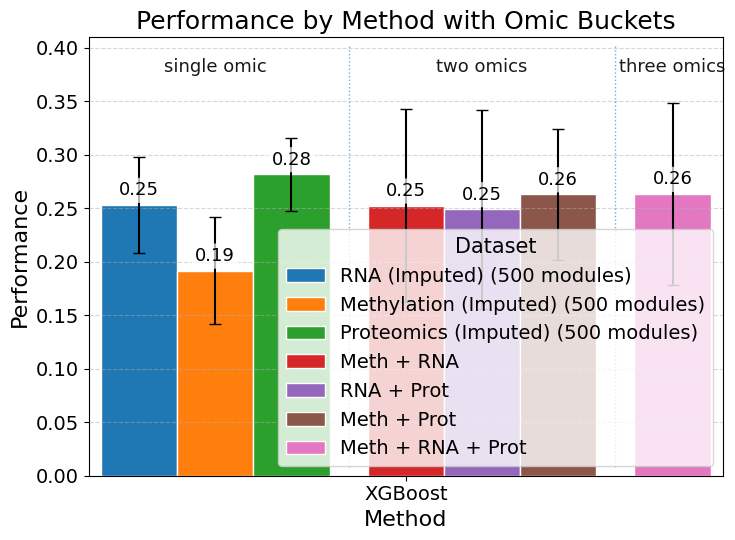

In [20]:
sheet_name = 'Multi - Modules'
title = "Multi-Omic concatenation: GSVA-score 500 mocules datasets"

number_of_modules = ["Meth + RNA", "RNA + Prot", "Meth + Prot", "Meth + RNA + Prot"]
number_of_modules2 =  ["RNA (Imputed) (500 modules)", "Methylation (Imputed) (500 modules)", "Proteomics (Imputed) (500 modules)"]

datasets_print =  ["Meth + RNA", "RNA + Prot", "Meth + Prot", "Meth + RNA + Prot"]
datasets_print2 = ["RNA", "Meth" + "Prot"]

# methods = ["ElasticNet","KRR","Lasso","XGBoost"]
methods = ["XGBoost"]
methods_print = methods
metric = "r2"
hatches = [False]*len(number_of_modules)

bucket_by = ["single","single","single", "two","two","two", "three"]

# pretty names + order
bucket_names_map = {"single":"single omic", "two":"two omics", "three":"three omics"}
bucket_order = ["single","two","three"] 


# bucket_by = [ "two","two","two", "three"]

# # pretty names + order
# bucket_names_map = {"two":"two omics", "three":"three omics"}
# bucket_order = ["two","three"] 

results_mean, results_std = load_results(sheet_name, number_of_modules, methods)

results_mean2, results_std2 = load_results("Single - Modules", number_of_modules2, methods)

results_mean.update(results_mean2)
results_std.update(results_std2)


plot_grouped_bars_with_custom_buckets(
    data=results_mean,
    methods=methods,
    datasets=number_of_modules2 + number_of_modules,
    bucket_by=bucket_by,
    bucket_order=bucket_order,
    bucket_names_map=bucket_names_map,
    bucket_gap=0.5,                # tweak spacing between the groups
    legend_title="Dataset",
    title="Performance by Method with Omic Buckets",
    annotate=True,
    errors = results_std
)
plt.show()


### Classification

In [ ]:
method_alias = {"XGBoost": "xgb", "Logistic Regression": "logreg", "SVC": "svm", "XGBoost (balanced)": "xgb_balanced", "Logistic Regression (balanced)": "logreg_balanced", "SVC (balanced)": "svm_balanced"}

for my_method in ["XGBoost", "Logistic Regression", "SVC"]:

    sheet_name = "Classification"
    title = f"{my_method} Classification"

    # number_of_modules = ["XGBoost", "XGBoost (balanced)", "Logistic Regression", "Logistic Regression (balanced)", "SVC", "SVC (balanced)"]
    # method_alias = ["xgb", "xgb_balanced", "logreg", "logreg_balanced", "svm", "svm_balanced"]
    number_of_modules = [my_method, f"{my_method} (balanced)"]
    datasets_print = ["none", "balanced"]

    methods = ["auc_accuracy", "auc_acc_class_0.0", "auc_acc_class_1.0", "auc_acc_class_2.0", "auc_acc_class_3.0"]
    methods_print = ["All", "[0,2)", "[2,4)", "[4,6)", "[6,8)"]

    colors = None
    hatches = [False, True]
    metric = "accuracy"
    x_label = "AUC Class"
    y_label = "% Correctly Classified"

    # colors = list(colours_df.loc[number_of_modules].values)
    colors = ["tab:blue"]*2

    results_mean = {}
    results_std = {}
    for i, method in enumerate(number_of_modules):
        dataset_means = []
        dataset_vars = []
        df = pd.read_csv(f'../runs_multiclass/runs_modules/RNA_Imputed/500/{method_alias[method]}/aggregated_test_results.csv', index_col=0)
        
        for metric in methods:
            dataset_means.append(df.loc[metric, "mean"])
            dataset_vars.append(df.loc[metric, "std"])

        results_mean[method] = dataset_means
        results_std[method] = dataset_vars
    print(results_mean)

    data = results_mean
    errors = results_std

    fig, ax_figsize = plt.subplots(figsize=(6, 6))

    fig, ax = plot_grouped_bars_with_uncertainty(
        data=data,
        ax = ax_figsize,
        dataset_names = datasets_print,
        bar_total_width = 0.5,
        methods=methods_print,
        errors=errors,                 # or None
        title=title,
        hatches = hatches,
        annotate=True,                 # show values on the bars
        colors = colors,
        ylabel = y_label,
        xlabel = x_label,
        legend_title = "Sample weights",
    )


In [94]:
colors = list(colours_df.loc[number_of_modules].values)

In [45]:
df = pd.read_excel(f'../data/Results/UCL_Dissertation_Data.xlsx', sheet_name=sheet_name)
if len(df.columns) == 7:
    df.columns = ['omic', 'nsamples', 'model', 'r2', 'r2_std', 'mse', 'mse_std']
else:
    df.columns = ['omic', 'nsamples', 'model', 'r2', 'r2_std', 'mse', 'mse_std', 'info']
df.head()

,omic,nsamples,model,r2,r2_std,mse,mse_std,info
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Histone + RNA (Imputed),432.0,ElasticNet,0.2627,0.0558,1.285,0.1630,NaN
2,Histone + RNA (Imputed),NaN,Lasso,0.2359,0.0317,1.3462,0.2672,NaN
3,Histone + RNA (Imputed),NaN,KRR,0.2757,0.0740,1.2616,0.1690,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
results_mean = {}
results_std = {}
for dataset in number_of_modules:
    dataset_means = []
    dataset_vars = []
    for method in methods:
        df_filtered = df[(df["omic"] == dataset) & (df["model"] == method)]
        # df_filtered = df[(df["omic"] == dataset)]
        if len(df_filtered) > 1:
            row = df_filtered.iloc[0]
            dataset_means.append(row[metric])
            dataset_vars.append(row[metric + "_std"])
        elif len(df_filtered) >0:
            dataset_means.append(df_filtered[metric].item())
            dataset_vars.append(df_filtered[metric+"_std"].item())
        else:
            dataset_means.append(None)
            dataset_vars.append(None)
    results_mean[dataset] = dataset_means
    results_std[dataset] = dataset_vars
print(results_mean)

{'RNA (Imputed)': [0.251, 0.259, 0.274], 'Histone + RNA (Imputed)': [0.2359, 0.2627, 0.2757], 'RNA (Imputed) (TruncatedSVD)': [0.255, 0.257, 0.25], 'Histone + RNA (Imp, TruncatedSVD)': [0.258, 0.257, 0.255], 'RNA (Imputed) (VarianceThreshold) 14k': [0.269, 0.259, 0.2511], 'Histone + RNA (Imputed, VT0.1)': [0.235, 0.2627, 0.275]}


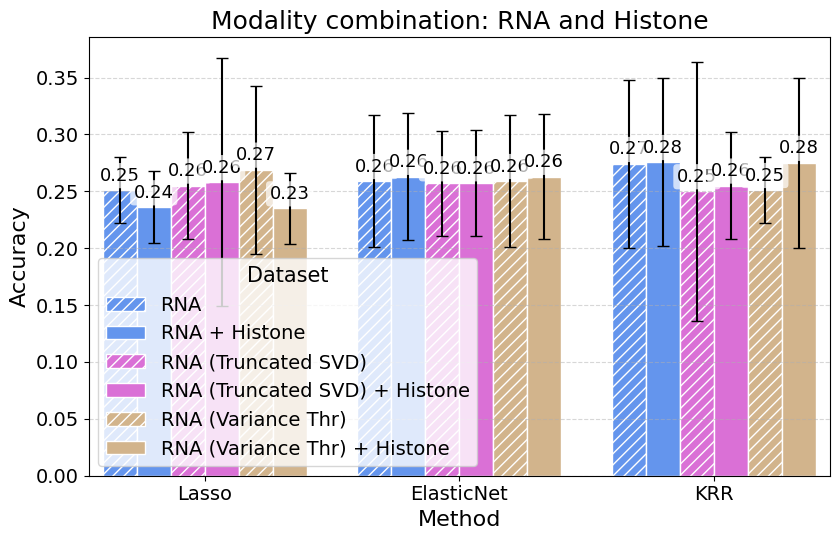

In [56]:
from plotting.grouped_bar_uncertainty import plot_grouped_bars_with_uncertainty

data = results_mean
errors = results_std

# fig, ax_figsize = plt.subplots(figsize=(7 + 0.5 * 8, 5.5))

fig, ax = plot_grouped_bars_with_uncertainty(
    data=data,
    dataset_names = datasets_print,
    # bar_total_width = 0.5,
    methods=methods_print,
    errors=errors,                 # or None
    title=title,
    hatches = hatches,
    ylabel="Accuracy",
    annotate=True,                 # show values on the bars
    colors = colors,
    # ax = ax_figsize
)


NameError: name 'plot_grouped_bars_with_uncertainty' is not defined

## Plots predictions

In [57]:
def plot_predictions(tag, run_dir, data_dir,
                                        label_csv_path='cleveland_auc_full.csv',
                                        n_folds=5):

    results_path = os.path.join(run_dir, tag)

    labels_df = pd.read_csv(f"{data_dir}/{label_csv_path}", index_col=0)
    label_series = labels_df[label_name] if label_name in labels_df.columns else labels_df.squeeze("columns")

    for phase in ["test", "train"]:
        for test_id in range(n_folds):
            test_file = os.path.join(results_path, f'test_{test_id}', 'best', f'{phase}_results.csv')
            if not os.path.exists(test_file):
                print(f"[warn] Missing: {test_file}")
                continue

            df = pd.read_csv(test_file, index_col=0)

            
            plt.plot(df[label_name], df[pred_name])


In [84]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_predictions_simple(tag, run_dir, label_name="auc", pred_name="auc_pred", n_folds=5):
    fig, axes = plt.subplots(2, n_folds, figsize=(14, 6))
    phases = ["train", "test"]

    for r, phase in enumerate(phases):
        for c in range(n_folds):
            ax = axes[r, c]
            fp = os.path.join(run_dir, tag, f"test_{c}", "best", f"{phase}_results.csv")
            fp_summary = os.path.join(run_dir, tag, f"test_{c}", "best", f"summary_results.csv")
            if not os.path.exists(fp):
                ax.axis("off"); continue

            df = pd.read_csv(fp, index_col=0)[[label_name, pred_name]].dropna()

            ax.scatter(df[pred_name], df[label_name], s=8, alpha=0.6)

            lo = min(df[label_name].min(), df[pred_name].min())
            hi = max(df[label_name].max(), df[pred_name].max())
            ax.plot([lo, hi], [lo, hi], "--", lw=1)

            try:
                s = pd.read_csv(fp_summary, index_col=0).loc[phase]
                txt = f"R²={s.auc_r2:.3f}\nMSE={s.auc_mse:.3f}\nn={len(df)}"
            except Exception: 
                txt = f"n={len(df)}"
            ax.text(0.03, 0.97, txt, transform=ax.transAxes, va="top", ha="left", fontsize=10)

            ax.set_title(f"{phase} • fold {c}", fontsize=14)

            # removed per-subplot axis labels

    # single labels for the whole figure
    fig.supxlabel("Predicted AUC", fontsize=16)
    fig.supylabel("True AUC", fontsize=16)

    fig.tight_layout()
    plt.show()


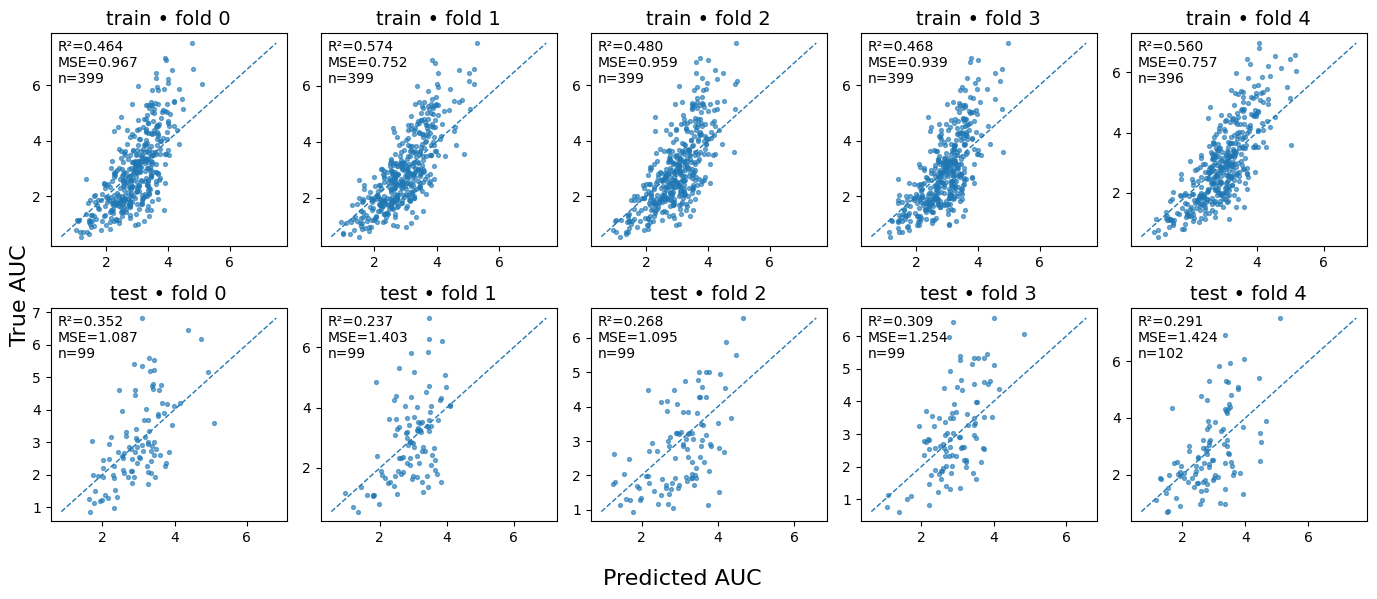

In [86]:
plot_predictions_simple("krr", "../runs/runs_modules/rna_imputed/500/" )

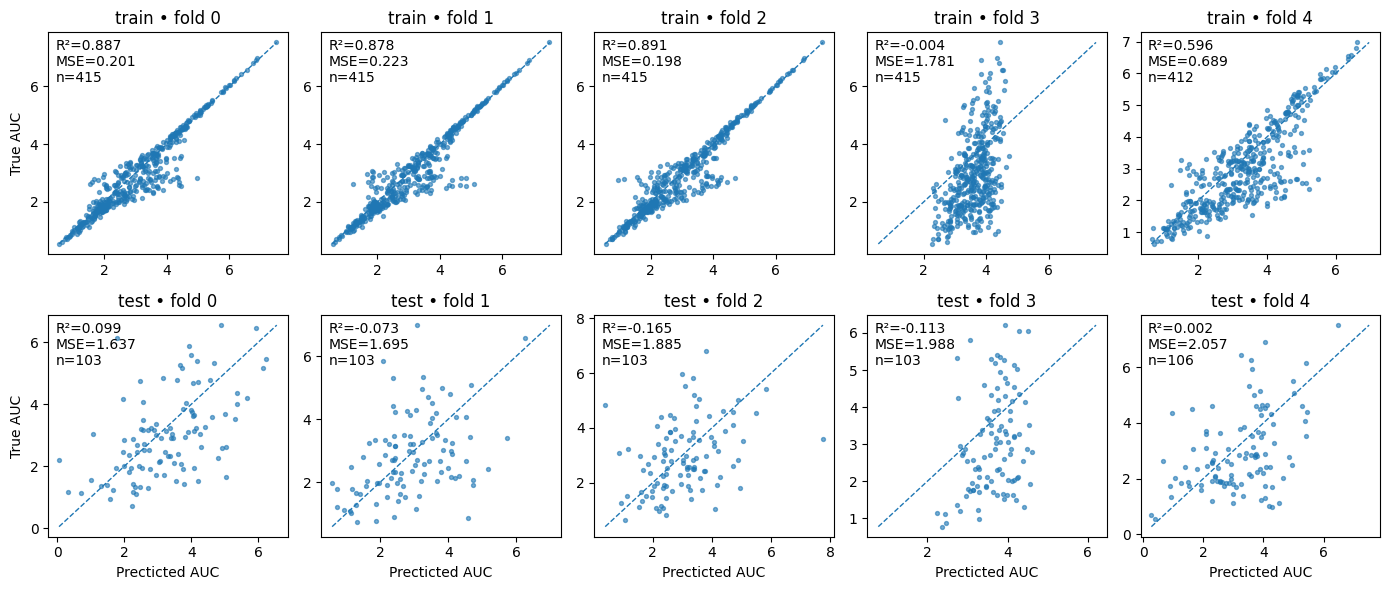

In [65]:


plot_predictions_simple("krr", "../runs/runs_modules/rna_imputed/500/weighted_ByLabelFn/mad_alpha_2.0_eps_1e-1" )

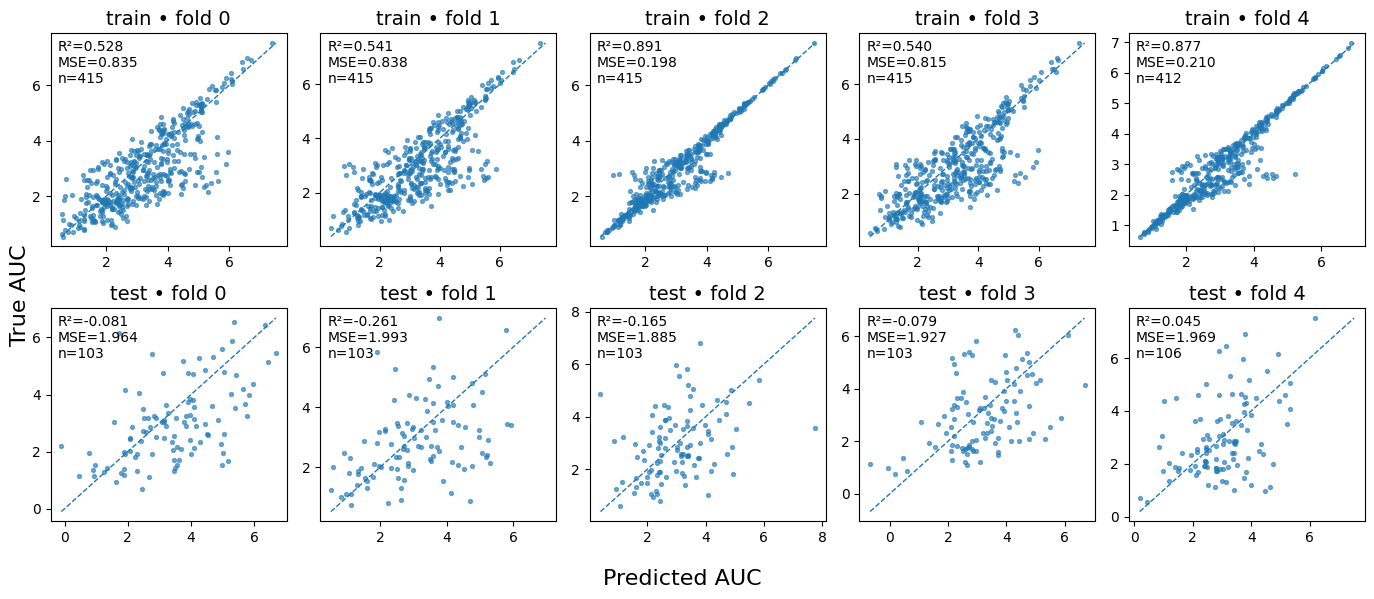

In [ ]:
plot_predictions_simple("krr", "../runs/runs_modules/rna_imputed/500/weighted_ByLabelFn/FOLD_mad_alpha_2.0_eps_1e-1" )

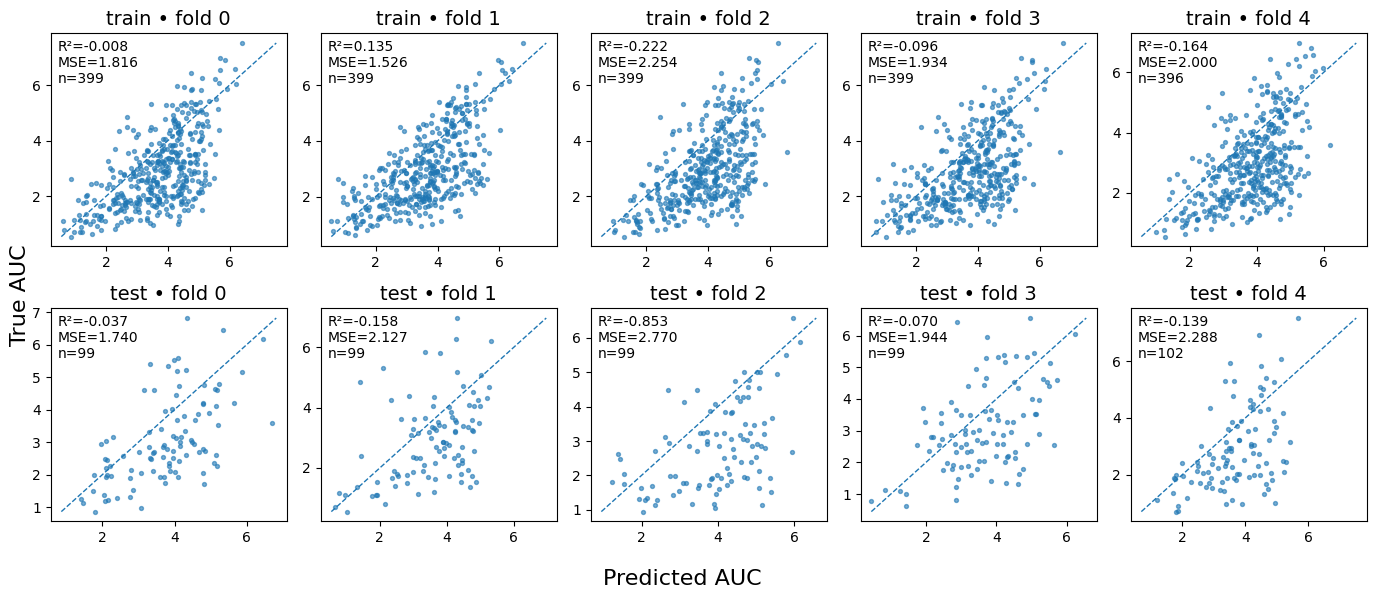

In [88]:
plot_predictions_simple("krr", "../runs/runs_modules/rna_imputed/500/weighted_ByLabelFn/FOLD_mad_alpha_2.0_eps_1e-3" )

# GSVA Heatmap

In [2]:
import pandas as pd

In [6]:
rna = pd.read_csv('../data/Imputed/rna_imputed.csv', index_col=0)
modules = pd.read_csv('../modules_experiment/gsva_scores/gsva_scores_rna_imputed_500.csv', index_col=0)
rna.head()

,A1BG,A1CF,A2M,A2ML1,A4GALT,AAAS,AACS,AADAC,AADAT,AAGAB,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
model_id,,,,,,,,,,,,,,,,,,,,,
MEC1,2.58887,-4.83117,-1.62123,-5.93068,0.47358,6.05650,5.79186,-6.26181,-4.33735,6.29573,...,5.80692,7.32077,1.58452,3.82334,4.80358,1.24645,4.20582,5.47677,6.59633,5.37410
M14,2.91758,-4.93131,4.68513,-4.49998,-0.52797,5.88716,5.27179,-4.62904,3.00837,6.22111,...,6.15961,6.71007,1.22558,3.44854,5.11663,-1.30122,5.43414,7.14434,6.09309,6.10931
MDAMB134VI,4.80930,-2.97931,0.92657,-2.20517,-0.25651,5.60041,5.74415,-4.87802,1.15672,6.44445,...,5.64151,7.36841,2.96660,4.35380,5.51078,2.63350,5.12473,4.38470,6.04948,5.34818
MCC26,1.84053,-4.62735,3.55042,-5.69768,1.34830,5.25348,4.95691,-2.80187,4.08723,6.62992,...,6.79594,6.83536,2.43491,4.25010,4.04649,1.01687,5.79773,7.45509,5.52872,6.50017
MCC13,2.28839,-5.77944,1.84789,-6.40495,2.40805,5.37865,4.96924,-3.01535,3.65630,6.61214,...,6.37185,6.44571,2.85615,4.41206,3.88880,1.25975,5.95038,7.30937,5.83469,6.50540


In [8]:
modules

,60,71,92,120,129,141,189,319,333,344,...,5110,5114,5117,5123,5125,5126,5130,5143,5145,5168
MEC1,0.387691,0.263692,-0.170646,-0.343122,-0.039729,-0.448385,0.536602,-0.453546,0.464656,-0.087628,...,0.579444,-0.442073,0.519713,-0.203405,-0.307341,-0.657258,0.347276,0.648477,-0.500627,-0.476296
M14,0.332613,-0.467962,0.056384,0.425556,-0.238862,0.093367,0.202786,-0.523530,-0.072027,-0.543957,...,-0.637778,0.369238,0.176532,-0.168260,0.365533,0.347474,-0.709366,-0.552540,-0.533382,-0.501450
MDAMB134VI,-0.452228,0.350850,-0.023213,-0.384749,0.374074,-0.237352,0.459610,0.819502,0.336872,0.005593,...,-0.462778,-0.054362,-0.523582,-0.632925,0.308784,-0.709415,0.453688,0.452414,0.676575,0.734592
MCC26,-0.281784,-0.432442,0.260629,0.320785,-0.137589,0.086291,-0.370944,0.713371,-0.171349,0.708431,...,-0.943889,0.062416,0.032240,0.515321,0.005766,0.475264,0.001511,-0.492375,-0.450015,0.826763
MCC13,-0.256377,-0.412286,0.233592,0.591804,-0.034763,0.258204,-0.510253,0.715464,-0.135486,0.829624,...,-0.872222,-0.342743,0.624792,0.550742,0.300274,0.416042,-0.134125,-0.035274,-0.143969,0.421433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ICC3,0.405882,-0.469957,0.432252,0.255135,0.298135,0.032330,-0.526778,0.093993,-0.524057,-0.491775,...,-0.719939,0.096216,-0.081712,-0.508942,0.324069,0.161272,-0.694569,-0.706873,-0.183067,-0.642019
ICC9,0.384537,-0.366939,-0.248796,0.023346,0.391397,-0.437583,-0.646453,-0.667063,-0.266641,-0.167408,...,-0.694036,0.241516,-0.327771,0.140129,0.242084,0.341164,0.071974,-0.395802,-0.425394,-0.902277
ICC12,-0.009975,-0.388013,-0.293493,0.226445,0.250583,0.051640,-0.603540,-0.333695,-0.313641,0.339619,...,-0.641588,0.338748,-0.429104,-0.231196,0.402806,0.383956,-0.031222,-0.523169,-0.291887,-0.071627
CCLF_PEDS_0003_T,0.207706,0.151397,0.316528,-0.319118,-0.022131,-0.203647,0.095218,0.777984,-0.059382,-0.605101,...,-0.041111,0.264640,0.014451,-0.558966,-0.511058,-0.239524,-0.626390,-0.658301,0.430846,0.698074


In [11]:
rna.columns[1:14000:1000]

Index(['A1CF', 'ATG16L1', 'CCNB3', 'CSTA', 'EMILIN1', 'GFRA3', 'IL18',
       'LRRC8E', 'MYO1F', 'PAX8', 'PRPS2', 'RPS6KA2', 'SMARCAD1', 'TGM2'],
      dtype='object')

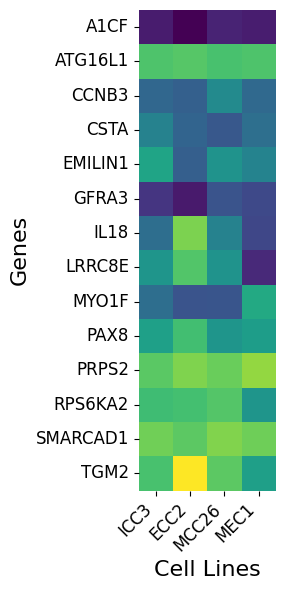

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: lists you want to keep
selected_genes = ['A1CF', 'ATG16L1', 'CCNB3', 'CSTA', 'EMILIN1', 'GFRA3', 'IL18','LRRC8E', 'MYO1F', 'PAX8', 'PRPS2', 'RPS6KA2', 'SMARCAD1', 'TGM2']
selected_cells = ["ICC3", "ECC2", "MCC26", "MEC1"]

# Reduce the dataframe
reduced_df = rna.T.loc[selected_genes, selected_cells]

# Plot heatmap
plt.figure(figsize=(8, 6))  # Increase figure size so labels fit
sns.heatmap(reduced_df, 
            cmap="viridis", 
            annot=False, 
            cbar=False, 
            xticklabels=True, 
            yticklabels=True,
            square = True)

# Make sure labels are readable
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.xlabel("Cell Lines", fontsize=16)
plt.ylabel("Genes", fontsize=16)
# plt.title("Heatmap of Gene Expression", fontsize=16, pad=20)
plt.tight_layout()
plt.show()


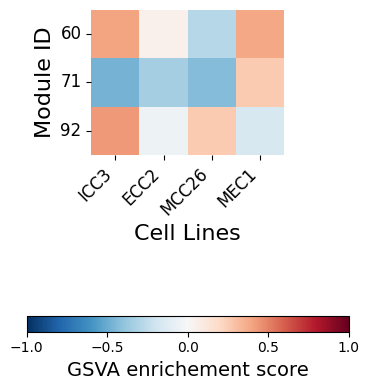

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_genes = ['60', '71', '92']

# Example reduced df
reduced_df = modules.T.loc[selected_genes, selected_cells]

fig, ax = plt.subplots(figsize=(4, 4))

# Draw heatmap without seaborn’s default cbar
sns.heatmap(
    reduced_df,
    cmap="RdBu_r",
    annot=False,
    square=True,
    xticklabels=True,
    yticklabels=True,
    vmin=-1, vmax=1,
    cbar=False,
    ax=ax
)

# Add custom colorbar below
cbar = fig.colorbar(
    ax.collections[0],          # heatmap object
    ax=ax,
    orientation="horizontal",   # place it underneath
    fraction=0.05,              # size relative to plot
    pad=0.5                  # space between heatmap & cbar
)

cbar.set_label("Gene set Score", fontsize=14)

# Axis labels
ax.set_xlabel("Cell Lines", fontsize=16)
ax.set_ylabel("Module ID", fontsize=16)

# Tick labels
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# plt.title("Heatmap of Gene Expression", fontsize=16, pad=20)
plt.tight_layout()
plt.show()
